In [1]:
from bs4 import BeautifulSoup
import requests
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.ptt.cc/'
#下面的網址可填入任何一個版，我是以e-shopping版、graduate版、PhD和AfterPhD版為基準
web = requests.get('https://www.ptt.cc/bbs/e-shopping/index.html', cookies={'over18':'1'})
#第一關保險：預置Cookies作為通關密碼
soup = BeautifulSoup(web.text, "html.parser")
titles = soup.find_all('div', class_='title')   
# 取得 class 為 title 的 div 內容
# 基本參數
payload = {
    'from': '/bbs/Gossiping/index.html',
    'yes': 'yes'
}
data = []   # 全部文章的資料
num = 0
#第二關保險：用session紀錄cookie訊息
rs = requests.session()
response = rs.post("https://www.ptt.cc/ask/over18", data=payload)

In [3]:
urls = '' # 建立代表所有網址(但沒有分行)的urls變數
for i in range(10): #讀取幾頁的網址，這裡是10頁
    for i in titles:
            urls = urls + url + i.find('a')['href'] + '\n'
            web = "https://www.ptt.cc"+soup.find("a", string="‹ 上頁")["href"]
            #迴圈結束時按下上一頁按鈕，次數同迴圈圈數

In [4]:
urlsList = urls.split('\n') #將所有要找尋的網址以\n為基準分段、並存成一維陣列

In [5]:
hourList=[]
for i in range(len(urlsList)-2):
    page_url = urlsList[i]
    response = rs.get(page_url)
    result = BeautifulSoup(response.text, "html.parser")
    #print(result.prettify())
    # 找出作者、標題、時間、留言
    main_content = result.find("div", id="main-content")
    article_info = main_content.find_all("span",class_="article-meta-value")
    #將函數存成時間字串
    time = article_info[3].string
    time_obj = datetime.datetime.strptime(time, '%a %b %d %H:%M:%S %Y')
    hour_str = time_obj.strftime('%H')
    hourList.append(hour_str)

In [6]:
hourList

['16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '13',
 '16',
 '14',
 '08',

In [7]:
import pandas as pd

# 將 hourList 轉換為 Pandas Series
hourSeries = pd.Series(hourList)

# 使用 value_counts() 方法計算每個小時出現的次數
hourCounts = hourSeries.value_counts()

print(hourCounts)

16    30
19    20
21    20
14    20
17    10
11    10
15    10
20    10
13    10
08    10
04     9
dtype: int64


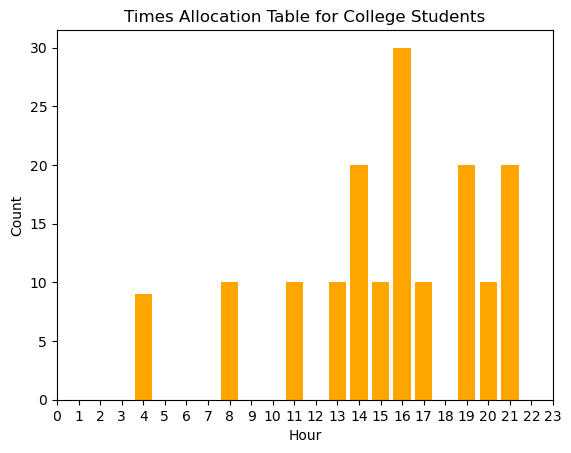

In [10]:
# 繪製長條圖
plt.bar(hourCounts.index.astype(int), hourCounts.values, color='orange')

# 設置圖表標題和軸標籤
plt.title('Times Allocation Table for College Students')
plt.xlabel('Hour')
plt.ylabel('Count')

# 設置 X 軸刻度
plt.xticks(range(0, 24))

# 顯示圖表
plt.show()

In [ ]:
#爬蟲的部分大致在上面，我將數Json